In [126]:
import pandas as pd
from skimage import io, transform, color
import os
from tqdm import tqdm
import numpy as np
import csv
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# **Loading of Data**

Data frame initial columns names

In [18]:
columns = ['age', 'gender', 'race']
for pixel in range(200*200):
    columns.append("pixel"+str(pixel+1)+"R")
    columns.append("pixel"+str(pixel+1)+"G")
    columns.append("pixel"+str(pixel+1)+"B")



Loading the UTKFace data into a matrix, X is the data en y the shape (3,1) target

In [32]:
errors = 0
image_path = 'UTKFace'

X = []
y = []

for file in tqdm(os.listdir(image_path)):
    try:
        # Load, transform image
        color_image = np.array(io.imread(os.path.join(image_path, file)))
        new_row = list(map(float, file.split("_")[:3]))
        y.append(new_row)
        color_image = color_image.reshape(-1).tolist()
        X.append(color_image)
    except Exception as e:
        errors += 1


100%|██████████| 23708/23708 [03:16<00:00, 120.50it/s]


In [33]:
print(len(X))
print(len(X[0]))

23705
120000


In [42]:
print(len(y))
print(len(y[0]))

23705
3


We performed a 1000 components PCA

In [34]:
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)

In [35]:
print(len(X_pca))
print(len(X_pca[0]))

23705
1000


In [36]:
np.savetxt("X_PCA_"+str(len(X_pca[0]))+"_components.csv", X_pca, delimiter=",")

In [37]:
X = np.array(X_pca)
y = np.array(y)

When code isn't compiled, run this to load data with PCA

In [ ]:
X = pd.read_csv('X_PCA_1000_components.csv').to_numpy()

# **Data Analysis**

Feature Engineering


Null value checking

In [39]:
df = pd.DataFrame(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Columns: 1000 entries, 0 to 999
dtypes: float64(1000)
memory usage: 180.9 MB


In [40]:
df = pd.DataFrame(y)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23705 non-null  float64
 1   1       23705 non-null  float64
 2   2       23705 non-null  float64
dtypes: float64(3)
memory usage: 555.7 KB


Bias per class in the 3 variables

Age

In [79]:
df = pd.DataFrame(y)
df[0].value_counts()

0
26.0     2197
1.0      1123
28.0      918
35.0      880
24.0      859
         ... 
115.0       3
91.0        2
101.0       2
103.0       1
111.0       1
Name: count, Length: 104, dtype: int64

C:\Users\geogd\AppData\Local\Temp\ipykernel_19764\3624736495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[0], palette="Set1")


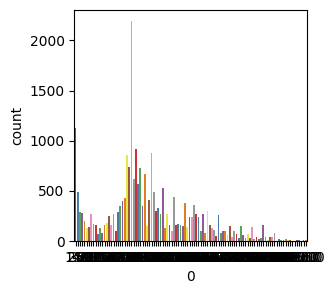

In [86]:
f, ax = plt.subplots(figsize=(3, 3))
ax = sns.countplot(x=df[0], palette="Set1")
plt.show()

Gender

In [ ]:
df[1].value_counts()

1
0.0    12391
1.0    11314
Name: count, dtype: int64

C:\Users\geogd\AppData\Local\Temp\ipykernel_19764\3180355283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[1], palette="Set1")


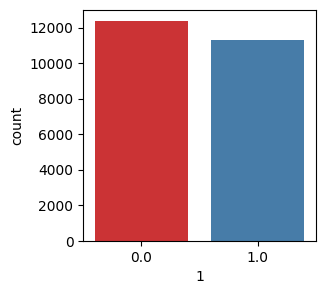

In [87]:
f, ax = plt.subplots(figsize=(3, 3))
ax = sns.countplot(x=df[1], palette="Set1")
plt.show()

0 for men

1 for women

Race

In [ ]:
df[2].value_counts()

2
0.0    10078
1.0     4526
3.0     3975
2.0     3434
4.0     1692
Name: count, dtype: int64

C:\Users\geogd\AppData\Local\Temp\ipykernel_19764\3471218125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[2], palette="Set1")


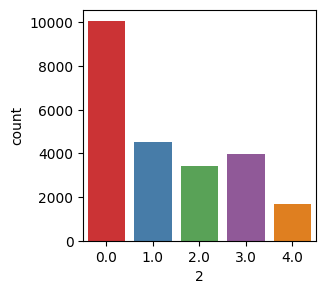

In [89]:
f, ax = plt.subplots(figsize=(3, 3))
ax = sns.countplot(x=df[2], palette="Set1")
plt.show()

0 for caucasian

1 for african

2 for asian

3 for indian

4 for arab

Duplicates

In [51]:
df = pd.DataFrame(X)
count_duplicates = df[df.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 303


Outliers

In [74]:
df = pd.DataFrame(X)
pca = PCA(n_components=2)
X_pca_to_plot = pca.fit_transform(df)


{'whiskers': [<matplotlib.lines.Line2D at 0x14f0855bc10>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x14f07651190>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x14f0855bd50>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x14f07652310>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x14f07650990>,
  ...],
 'means': []}

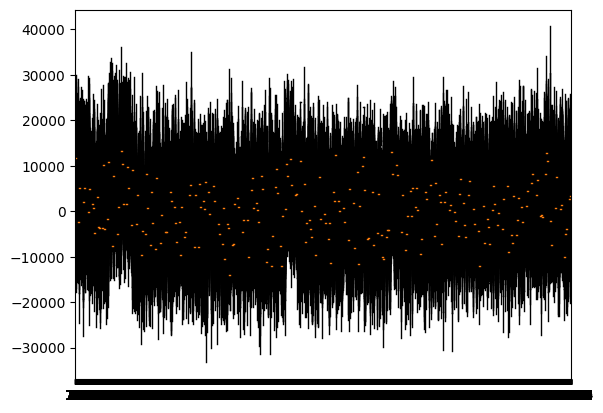

In [94]:
plt.boxplot(X_pca_to_plot.T)

# **Sampling Data**

Feature Engineering

In [189]:
df_X = pd.DataFrame(X)
df_y = pd.DataFrame(y)

df_X[len(df_X.columns)] = df_y.iloc[:, 0]  # Add the first column from df_y to df_X
df_X[len(df_X.columns)] = df_y.iloc[:, 1]  # Add the second column from df_y to df_X

rus = RandomUnderSampler(sampling_strategy={0.0: 5000}, random_state=42)
X_sm, y_sm = rus.fit_resample(df_X, df_y[2])

X_sm = pd.DataFrame(X_sm)
y_sm = pd.DataFrame(y_sm)

y_sm[len(y_sm.columns)-1] = X_sm.iloc[:, -2]  # Add the second last column from X_sm to y_sm
y_sm[len(y_sm.columns)-1] = X_sm.iloc[:, -1]  # Add the last column from X_sm to y_sm

X_sm = X_sm.iloc[:, :-2]

first_column = y_sm.columns[0]
y_sm[first_column] = y_sm.pop(first_column)
y_sm["2"] = first_column
y_sm = y_sm.iloc[:, :-1]


In [190]:
print(X_sm)

                0            1            2            3            4    \
23298   4724.330990 -2677.529294 -7013.801608   413.918763  2683.773160   
39      7546.336638 -1000.355804   316.800237 -3167.110590 -5209.852475   
2975    9312.867750 -5389.253208 -6773.280054  3880.594052  1512.905929   
19165   3715.170077   -46.408755 -2549.017372 -3900.975298  -764.741411   
17286   3966.773475  5726.425520 -7675.272387 -1285.457987 -1830.158897   
...             ...          ...          ...          ...          ...   
23673 -13320.395261  5969.382904  5982.558307  4670.958813 -2884.429090   
23674  -4920.917868 -4034.593984  5101.058227  2575.320812  -595.430114   
23702  15546.410828 -2920.783906  1319.805393  4600.437843 -1830.383603   
23703   5650.698783 -5956.548888 -8157.927524  3332.458271 -2883.382598   
23704  10661.937162  -661.109964   500.723816   497.227619 -2505.362284   

               5            6            7            8            9    ...  \
23298 -1002.313900 -

In [191]:
print(y_sm)

          0    1    2
23298   8.0  1.0  0.0
39     10.0  0.0  0.0
2975   21.0  0.0  0.0
19165  54.0  1.0  0.0
17286  48.0  0.0  0.0
...     ...  ...  ...
23673   9.0  0.0  4.0
23674   9.0  0.0  4.0
23702   9.0  1.0  4.0
23703   9.0  1.0  4.0
23704   9.0  1.0  4.0

[18627 rows x 3 columns]


C:\Users\geogd\AppData\Local\Temp\ipykernel_19764\3597133842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_sm[2], palette="Set1")


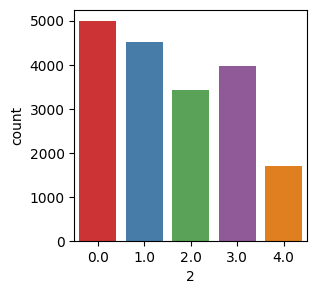

In [193]:
f, ax = plt.subplots(figsize=(3, 3))
ax = sns.countplot(x=y_sm[2], palette="Set1")
plt.show()

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, shuffle=False)

In [196]:
print(X_train)

                0            1             2            3            4    \
23298   4724.330990 -2677.529294  -7013.801608   413.918763  2683.773160   
39      7546.336638 -1000.355804    316.800237 -3167.110590 -5209.852475   
2975    9312.867750 -5389.253208  -6773.280054  3880.594052  1512.905929   
19165   3715.170077   -46.408755  -2549.017372 -3900.975298  -764.741411   
17286   3966.773475  5726.425520  -7675.272387 -1285.457987 -1830.158897   
...             ...          ...           ...          ...          ...   
10433   3978.520950  6354.331752   -502.518121  5480.100640 -1347.924072   
10434  -3008.286935  7116.515347  -5969.017800  -799.172307 -3167.221488   
10435  -8172.574501 -2872.688889  10829.432881  2759.576977 -2320.808378   
10436  13848.164176  3667.924583   4580.959923  4501.845373 -1173.991379   
10437  -2501.248544 -1811.687133   6202.868352  4370.042367  1959.016168   

               5            6            7            8            9    ...  \
23298 -1

In [197]:
print(y_train)

          0    1    2
23298   8.0  1.0  0.0
39     10.0  0.0  0.0
2975   21.0  0.0  0.0
19165  54.0  1.0  0.0
17286  48.0  0.0  0.0
...     ...  ...  ...
10433   2.0  1.0  3.0
10434   2.0  1.0  3.0
10435   2.0  1.0  3.0
10436   2.0  1.0  3.0
10437   2.0  1.0  3.0

[14901 rows x 3 columns]


In [198]:
print(X_test)

                0            1             2             3            4    \
10438  14790.345412  6173.418754   3866.893928   3116.406703  6021.406765   
10439   8328.229947  1735.997600  -3236.917664   1278.870857  2811.854328   
10440  -2440.395648 -1652.807832  -2965.091571   1570.252127  -642.577251   
10441   7489.853804 -5935.034748   1718.614348 -11008.779460  -408.912892   
10442   7794.337557  1518.413699  11826.924671   -770.512330 -2591.138831   
...             ...          ...           ...           ...          ...   
23673 -13320.395261  5969.382904   5982.558307   4670.958813 -2884.429090   
23674  -4920.917868 -4034.593984   5101.058227   2575.320812  -595.430114   
23702  15546.410828 -2920.783906   1319.805393   4600.437843 -1830.383603   
23703   5650.698783 -5956.548888  -8157.927524   3332.458271 -2883.382598   
23704  10661.937162  -661.109964    500.723816    497.227619 -2505.362284   

               5            6            7            8            9    ...

In [199]:
print(y_test)

         0    1    2
10438  2.0  1.0  3.0
10439  2.0  1.0  3.0
10440  2.0  1.0  3.0
10441  2.0  1.0  3.0
10442  2.0  1.0  3.0
...    ...  ...  ...
23673  9.0  0.0  4.0
23674  9.0  0.0  4.0
23702  9.0  1.0  4.0
23703  9.0  1.0  4.0
23704  9.0  1.0  4.0

[3726 rows x 3 columns]


# **Models**